**LAB MANUAL TASK(MULTIPLE LINEAR REGRESSION)**

In [1]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn import linear_model
import pandas as pd
import matplotlib.pyplot as plt

In [4]:

df=pd.read_csv("https://docs.google.com/spreadsheets/d/1ncZRplHVFURUMWGLBjIClcW3SFFUuhLR8gb1abapBoo/export?format=csv")
df.head()

,A,B,C,D,E,F
0,24,0.42,0.16,0.59,0.81,0.08
1,19,0.49,0.04,0.37,0.69,0.11
2,18,0.24,0.17,0.66,0.87,0.31
3,8,0.74,0.00,0.81,0.88,0.11
4,8,0.95,0.00,0.86,0.92,0.28


In [5]:
print(df.describe())

                A           B           C           D           E           F
count  123.000000  123.000000  123.000000  123.000000  123.000000  123.000000
mean    17.772358    0.403659    0.136260    0.645203    0.841138    0.141789
std      4.517385    0.133897    0.060101    0.169794    0.083942    0.080674
min      6.000000    0.140000    0.000000    0.260000    0.580000    0.020000
25%     16.000000    0.320000    0.095000    0.505000    0.780000    0.080000
50%     18.000000    0.380000    0.130000    0.640000    0.840000    0.130000
75%     20.000000    0.460000    0.180000    0.785000    0.910000    0.170000
max     31.000000    0.950000    0.310000    0.960000    0.980000    0.410000


In [6]:
df.corr()

,A,B,C,D,E,F
A,1.000000,-0.691900,0.414978,-0.604574,-0.521985,-0.549244
B,-0.691900,1.000000,-0.581516,0.487248,0.376735,0.540427
C,0.414978,-0.581516,1.000000,0.017023,0.055766,-0.175102
D,-0.604574,0.487248,0.017023,1.000000,0.934396,0.681660
E,-0.521985,0.376735,0.055766,0.934396,1.000000,0.647625
F,-0.549244,0.540427,-0.175102,0.681660,0.647625,1.000000


In [7]:
Y_POSITION=5

In [11]:
# Code for feature extraction and model splitting
model_1_features = [i for i in range(0, Y_POSITION)]

# Extracting features (X) and target variable (Y) from the DataFrame (df)
X = df.iloc[:, model_1_features]
Y = df.iloc[:, Y_POSITION]

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=2020)

In [17]:
model1 = linear_model.LinearRegression()
model1.fit(X_train, y_train)
y_pred_train1 = model1.predict(X_train)


In [19]:
# Calculate and print RMSE for training set
print("Regression")
print("====================")
RMSE_train1 = mean_squared_error(y_train, y_pred_train1)
print("Regression Train set: RMSE {}".format(RMSE_train1))

# Predict and evaluate on the testing set
y_pred1 = model1.predict(X_test)
RMSE_test1 = mean_squared_error(y_test, y_pred1)
print("====================")
print("Regression Test set: RMSE {}".format(RMSE_test1))

# Display model coefficients
coef_dict = {}
for coef, feat in zip(model1.coef_, model_1_features):
    coef_dict[df.columns[feat]] = coef
print(coef_dict)

Regression
Regression Train set: RMSE 0.002761693322289229
Regression Test set: RMSE 0.004209824026356377
{'A': np.float64(-0.0009337757382416938), 'B': np.float64(0.16012156890162943), 'C': np.float64(-0.044160015425349614), 'D': np.float64(0.15217907817100407), 'E': np.float64(0.17539950794101047)}


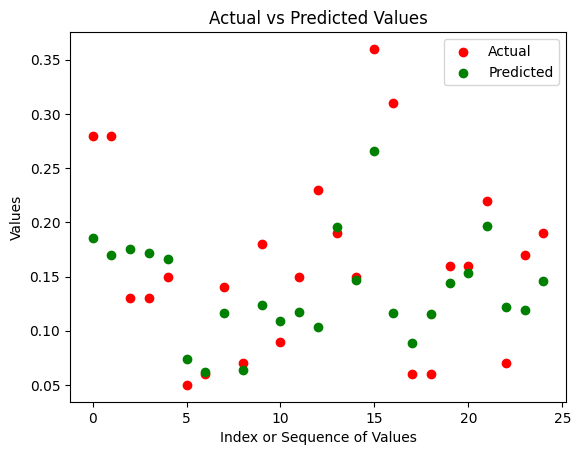

In [ ]:
x_values = np.arange(len(y_test))
plt.scatter(x_values, y_test, color='red', label='Actual')
plt.scatter(x_values, y_pred1, color='green', label='Predicted')
plt.xlabel('Index or Sequence of Values')
plt.ylabel('Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()
